# Estatística Inferencial com Python

## População e amostra

População ->
Conjunto completo do objeto de interesse

Amostra -> 
- É o recorte da população;
- Parcela da população.

Existem dois tipos de processo na amostragem:
- Amostragem probabilística;
- Amostragem não probabilística.

Na amostragem probabilística existem as técnicas:
- Amostragem aleatória simples;
- Amostragem estratificada;
- Amostragem sistemática;
- Amostragem em clusters.

Já na não probabílistica:
- Amostragem por conveniência;
- Amostragem por cota;
- Amostragem voluntária;
- Amostragem Intencional;
- Amostragem SnowBall

In [1]:
!pip install scikit-learn

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [3]:
# Utilizando os datasets do seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Tamanho da amostra
Existem diversos estudos e fórmulas que ajudam a calcular o tamanho ideal de uma amostragem

Utilizando a fórmula de slovin para realizar o cálculo do tamanho da amostra. Porém o cálculo do tamanho da amostra é apenas uma estimativa e que o tamanho real da amostra pode precisar ser ajustado de acordo com os resultados esperados para a pesquisa.

Onde a fórmula:

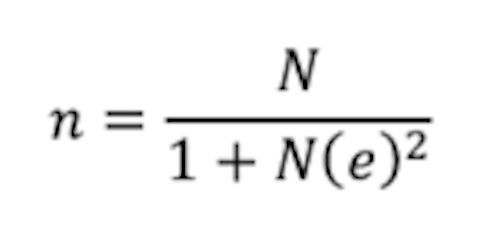

Sendo:
- N = tamanho da população
- e = margem de erro

In [19]:
# margem de erro de 5%
erro = 0.05
# população estimada
populacao = 1000
n = (populacao / (1 + (populacao * (erro ** 2))))
round(n)

286

Logo com as condições determinadas, 286 é o estimado para um tamanho amostral.

## Amostragem probabilísticas

### Amostragem aleatória simples

É o método onde cada elemento da população tem a mesma chance de ser selecionado, sorteando aleatoriamente os elementos. Ela pode ser ineficiente se a população for muito grande e a amostra muito pequena.

In [5]:
# Extraindo uma amostra de 100 linhas
amostra = df.sample(100)
amostra

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
815,0,1,male,NaN,0,0,0.0000,S,First,man,True,B,Southampton,no,True
83,0,1,male,28.0,0,0,47.1000,S,First,man,True,NaN,Southampton,no,True
604,1,1,male,35.0,0,0,26.5500,C,First,man,True,NaN,Cherbourg,yes,True
568,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
524,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,1,2,male,NaN,0,0,13.8625,C,Second,man,True,NaN,Cherbourg,yes,True
669,1,1,female,NaN,1,0,52.0000,S,First,woman,False,C,Southampton,yes,False
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
581,1,1,female,39.0,1,1,110.8833,C,First,woman,False,C,Cherbourg,yes,False


### Amostragem sistemática
É um método de seleção no qual os elementos são escolhidos de forma sistemática, com base em um intervalo fixo. Ele começa selecionando um ponto inicial aleatório na lista e então seleciona os elementos subsequentes de acordo com o intervalo fixo. Embora seja mais fácil de implementar do que a amostragem aleatória simples, pode ser influenciado por padrões na população que ocorrem em intervalos regulares, o que pode resultar em uma representação inadequada de certos subgrupos da população.

In [6]:
# np.arange(start, stop, step)
# inicio, final, passo
indices = np.arange(10, len(df), step=20)
print(indices)

[ 10  30  50  70  90 110 130 150 170 190 210 230 250 270 290 310 330 350
 370 390 410 430 450 470 490 510 530 550 570 590 610 630 650 670 690 710
 730 750 770 790 810 830 850 870 890]


In [7]:
amostra_sistematica = df.iloc[indices]
amostra_sistematica

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
70,0,2,male,32.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
90,0,3,male,29.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
110,0,1,male,47.0,0,0,52.0000,S,First,man,True,C,Southampton,no,True
130,0,3,male,33.0,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
150,0,2,male,51.0,0,0,12.5250,S,Second,man,True,NaN,Southampton,no,True
170,0,1,male,61.0,0,0,33.5000,S,First,man,True,B,Southampton,no,True
190,1,2,female,32.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True


### Amostragem estratificada
A amostragem estratificada é um método de seleção de amostras em que a população é dividida em subgrupos ou estratos que compartilham características semelhantes. Em seguida, uma amostra é selecionada de cada estrato de forma independente. Isso é feito para garantir que cada subgrupo da população seja representado adequadamente na amostra final.

A amostragem estratificada é mais precisa que a amostragem aleatória simples oara populações heterogêneas.



In [8]:
# Pegando em cima da coluna de class
porcentagem_classe = df['class'].value_counts(normalize=True)
porcentagem_classe

class
Third     0.551066
First     0.242424
Second    0.206510
Name: proportion, dtype: float64

In [9]:
corte = StratifiedShuffleSplit(n_splits=1,random_state=12)
corte

StratifiedShuffleSplit(n_splits=1, random_state=12, test_size=None,
            train_size=None)

In [10]:
for x, y in corte.split(df, df['class']):
    df_x = df.iloc[x]
    df_y = df.iloc[y]

print(df_x['class'].value_counts())
print(df_y['class'].value_counts())


class
Third     441
First     194
Second    166
Name: count, dtype: int64
class
Third     50
First     22
Second    18
Name: count, dtype: int64


In [11]:
display(df_y)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
356,1,1,female,22.0,0,1,55.0000,S,First,woman,False,E,Southampton,yes,False
308,0,2,male,30.0,1,0,24.0000,C,Second,man,True,NaN,Cherbourg,no,False
671,0,1,male,31.0,1,0,52.0000,S,First,man,True,B,Southampton,no,False
774,1,2,female,54.0,1,3,23.0000,S,Second,woman,False,NaN,Southampton,yes,False
334,1,1,female,NaN,1,0,133.6500,S,First,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0,1,male,64.0,0,0,26.0000,S,First,man,True,NaN,Southampton,no,True
450,0,2,male,36.0,1,2,27.7500,S,Second,man,True,NaN,Southampton,no,False
189,0,3,male,36.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
561,0,3,male,40.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


Outra forma de fazer a amostragem estratificada é pela biblioteca train_test_split, utilizado em Machine Learning

In [21]:
X = df.drop('class', axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
# A linha acima divide o conjunto de dados em dados de treinamento, os train, e dados de teste, os test.
# O test_size indica que 30% dos dados serão usados para teste e 70% para treinamento.
# stratify garante que a distribuição das classes seja mantida.

X_train

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
421,0,3,male,21.0,0,0,7.7333,Q,man,True,NaN,Queenstown,no,True
781,1,1,female,17.0,1,0,57.0000,S,woman,False,B,Southampton,yes,False
37,0,3,male,21.0,0,0,8.0500,S,man,True,NaN,Southampton,no,True
195,1,1,female,58.0,0,0,146.5208,C,woman,False,B,Cherbourg,yes,True
60,0,3,male,22.0,0,0,7.2292,C,man,True,NaN,Cherbourg,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,0,3,male,32.0,0,0,7.7500,Q,man,True,NaN,Queenstown,no,True
537,1,1,female,30.0,0,0,106.4250,C,woman,False,NaN,Cherbourg,yes,True
633,0,1,male,NaN,0,0,0.0000,S,man,True,NaN,Southampton,no,True
178,0,2,male,30.0,0,0,13.0000,S,man,True,NaN,Southampton,no,True


Uma explicação mais detalhada do código acima:

X_train: Este conjunto de dados contém as features (ou características) que serão usadas para treinar o modelo de machine learning. Ele representa a parte dos dados usados para ensinar o modelo a fazer previsões.

X_test: Este conjunto de dados também contém as features, mas é usado para avaliar o desempenho do modelo após o treinamento. As previsões do modelo são comparadas com os rótulos verdadeiros (contidos em y_test) para avaliar a precisão do modelo em dados não vistos durante o treinamento.

y_train: Este conjunto de dados contém os rótulos correspondentes às features em X_train. Em outras palavras, são as classes ou valores alvo associados aos exemplos de treinamento. É usado para treinar o modelo, permitindo que ele aprenda a fazer previsões corretas.

y_test: Assim como y_train, este conjunto de dados contém os rótulos, mas é usado para avaliar o desempenho do modelo após o treinamento. Ele representa as classes ou valores alvo verdadeiros para os exemplos de teste e é usado para avaliar a precisão das previsões feitas pelo modelo.

Em resumo, X_train e y_train são usados para treinar o modelo, enquanto X_test e y_test são usados para avaliar o quão bem o modelo generaliza para dados não vistos. A divisão entre conjuntos de treinamento e teste é fundamental para avaliar a capacidade do modelo de fazer previsões precisas em novos dados.

### Amostragem Probabilística por Conglomerado (cluster)

Serve para selecionar as pessoas em grupos.

In [26]:
grupo = df.groupby('sex').sample(frac=0.3)

amostra = grupo[grupo['sex'] == 'female']
amostra

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
483,1,3,female,63.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,yes,True
546,1,2,female,19.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
729,0,3,female,25.0,1,0,7.9250,S,Third,woman,False,NaN,Southampton,no,False
357,0,2,female,38.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,no,True
423,0,3,female,28.0,1,1,14.4000,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0,3,female,41.0,0,2,20.2125,S,Third,woman,False,NaN,Southampton,no,False
852,0,3,female,9.0,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False
777,1,3,female,5.0,0,0,12.4750,S,Third,child,False,NaN,Southampton,yes,True
576,1,2,female,34.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True


## Amostragem não probabilística

### Amostragem por conveniência
Essa técnica seleciona uma amostra da população que seja acessível na seleção.